# House Prices: Advanced Regression Techniques
This is the notebook for the dataset house prices in, her I will explore different models and train a machine learning algorithm for the given dataset
#### setup
General imports used during this exercise

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import kaggle.api as kg

import warnings
warnings.filterwarnings('ignore')

# Frame the problem
In this exercise I will try to predict the house prices in Ames, IOWA USA. There are a lot of attributes and a part of this exercise is to show that some of these attributes have more impact on the price than we think. I will try to do some feature engineering, but since I am pretty new to machine learning it probably won't be the best result. I will try to explain everything I do and why I do it. Making you follow my thoughts and maybe it'll be easier to help me improve the project

# Get the data
Downloads the train.csv dataset from Kaggle using the kaggle API. Also dowloads the data description which is a description of what the data means, this is just for my own sake so I know what I am dealing with.

In [2]:
PATH = "Datasets/"

def makeDir(dir):
    try:
        if not os.path.exists(dir):
            os.makedirs(dir)
    except OSError:
        print ('Error: Creating directory. ' +  dir)
        
makeDir(PATH)

If you want to you can remove the comment on the data_description file, it is used to get overview of the different attributes in the dataset.

In [3]:
kg.competition_download_file(competition="house-prices-advanced-regression-techniques", file_name="train.csv", path=PATH)
# kg.competition_download_file(competition="house-prices-advanced-regression-techniques", file_name="data_description.txt")

train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
def load_set():
    return pd.read_csv(os.path.join("Datasets", "train.csv"))

In [5]:
house_prices = load_set()

# Discover and visualize the data
Now that we have the dataset, it is time to get a good overview of what actually is a part of this dataset, we will need to visualize it using different methods. This is a big part of understanding what to do with the datasets and how to solve this exercise.

In [6]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
house_prices['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [9]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002209670D5C0>,
      dtype=object)

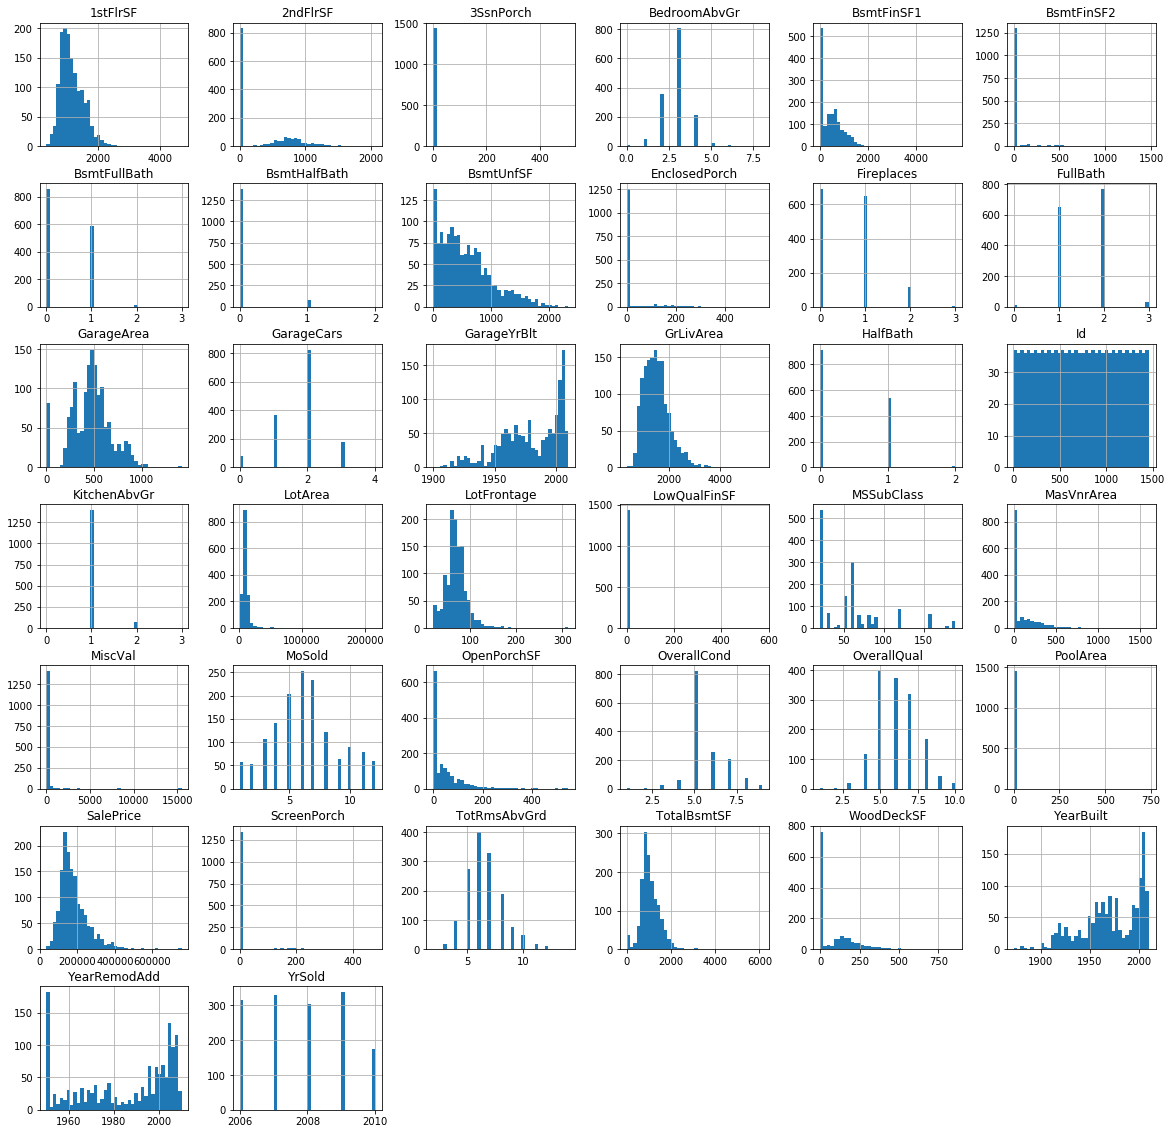

In [10]:
house_prices.hist(bins=40, figsize=(20, 20))

This is just a brief overview of the different values, and it doesn't tell us too much. Before I look to much into the data I will create a test set and a train set for the model, so that we do not look at all the values before we split it. We will train our models on the train set, and test our models on the test set too see how good they are.

In [11]:
from sklearn.model_selection import train_test_split

house_train, house_test = train_test_split(house_prices, random_state=21)

In [12]:
len(house_train)

1095

In [13]:
len(house_test)

365

In [14]:
discover = house_train.copy()

We see where most houses has been sold to check what part is most popular, we can see that it is North Ames

In [15]:
discover["Neighborhood"].value_counts()

NAmes      164
CollgCr    117
OldTown     85
Edwards     77
Somerst     66
Sawyer      61
NridgHt     56
Gilbert     55
NWAmes      54
SawyerW     42
BrkSide     41
Mitchel     35
Crawfor     33
Timber      32
NoRidge     32
IDOTRR      30
ClearCr     24
SWISU       22
StoneBr     16
Blmngtn     15
Veenker     11
MeadowV     10
BrDale      10
NPkVill      6
Blueste      1
Name: Neighborhood, dtype: int64

### Correlation matrix
Correlation matrix is a big part of discovering what parts of the data that can be made smaller, it will help visualize how much correlation are between each off the attributes. Maybe some of the attributes should be combined together such that we can get a better result from our model. In the first case we see attributes that have a correlation off above 80%.

In [16]:
correlation = discover.corr()

In [17]:
for i in range(len(correlation)):
    for j in range(len(correlation.iloc[i])):
        if (correlation.iloc[i, j] >= 0.8) & (correlation.iloc[i, j] < 1):
            print ("a correlation between: ", correlation.columns[j], " and ", correlation.columns[i], 
                   " of value: ", correlation.iloc[i, j])

a correlation between:  GarageYrBlt  and  YearBuilt  of value:  0.8235143303014008
a correlation between:  1stFlrSF  and  TotalBsmtSF  of value:  0.8085738278902258
a correlation between:  TotalBsmtSF  and  1stFlrSF  of value:  0.8085738278902258
a correlation between:  TotRmsAbvGrd  and  GrLivArea  of value:  0.8273023189385296
a correlation between:  GrLivArea  and  TotRmsAbvGrd  of value:  0.8273023189385296
a correlation between:  YearBuilt  and  GarageYrBlt  of value:  0.8235143303014008
a correlation between:  GarageArea  and  GarageCars  of value:  0.8792648819428563
a correlation between:  GarageCars  and  GarageArea  of value:  0.8792648819428563


We find these high correlations:
    1. GarageYrBlt and YearBuilt have a correlation of 82%
    2. 1stFlrSF and TotalBsmtSF have a correlation of 81%
    3. TotRmsAbvGrd and GrLivArea have a correlation of 83%
    4. GarageArea and GarageCars have a correlation of 88%

Now let's go into the data description too see if it is actually reasonable to maybe combine some of these attributes. 

GarageYrBlt is the year the garage was built and YearBuilt is the original construction date, attributes probably has a high correlation because the year the house was built and the year the garage was built is most likely the same most of the constructions. We should consider if it is only worth to keep the YearBuilt attribute, since that is the most important one. I should check if a newer garage impacts the value.

1stFlrSF how big the first floor is in square feet and TotalBsmtSF is the total basement square feet. This correlation tells me that most basements are as big as the first floor, maybe a combination of number of floors is in order, and then just have a total square feet of building attribute.

TotRmsAbvGrd is the total number of rooms above grade which means the portion of a home that is above the ground and GrLivArea is above ground area in square feet. This is probably in correlation to wheter or not the house has a basement.

GarageArea is the area of the garage in square feet and the GarageCars is the size of the garage in cars capacity, I'm pretty certain that we do not need both of them, so I will later remove GarageCars

I'll handle most of these thoughts in prepare the data for ML

In [18]:
# Let's check if garageYrBlt has a reasonable correlation to saleprice
garage_corr = discover["SalePrice"].corr(discover["GarageYrBlt"])
garage_corr

0.48999381443161283

In [19]:
# Let's check if YearBlt has a close correlation
year_corr = discover["SalePrice"].corr(discover["YearBuilt"])
year_corr

0.5128310067902088

After seeing this correlation I actually think that I will remove the GarageYrBlt attribute later on in the pipeline, this is because they both seem to have a similar impact on the saleprice, and they have a correlation between each other which also is pretty high.

In [20]:
correlation["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.787178
GrLivArea        0.718148
GarageCars       0.641507
GarageArea       0.612022
TotalBsmtSF      0.599195
1stFlrSF         0.591366
FullBath         0.563923
TotRmsAbvGrd     0.547136
YearBuilt        0.512831
YearRemodAdd     0.499300
GarageYrBlt      0.489994
MasVnrArea       0.484352
Fireplaces       0.468282
BsmtFinSF1       0.379780
2ndFlrSF         0.351080
LotFrontage      0.347284
WoodDeckSF       0.312542
HalfBath         0.307318
OpenPorchSF      0.301788
LotArea          0.256715
BsmtFullBath     0.243140
BsmtUnfSF        0.189561
BedroomAbvGr     0.174030
PoolArea         0.116848
ScreenPorch      0.112919
MoSold           0.065634
3SsnPorch        0.057082
BsmtFinSF2       0.011949
LowQualFinSF    -0.012911
YrSold          -0.015046
MiscVal         -0.029934
Id              -0.035850
BsmtHalfBath    -0.040561
MSSubClass      -0.073499
OverallCond     -0.105920
EnclosedPorch   -0.131291
KitchenAbvGr    -0.144439
Name: SalePr

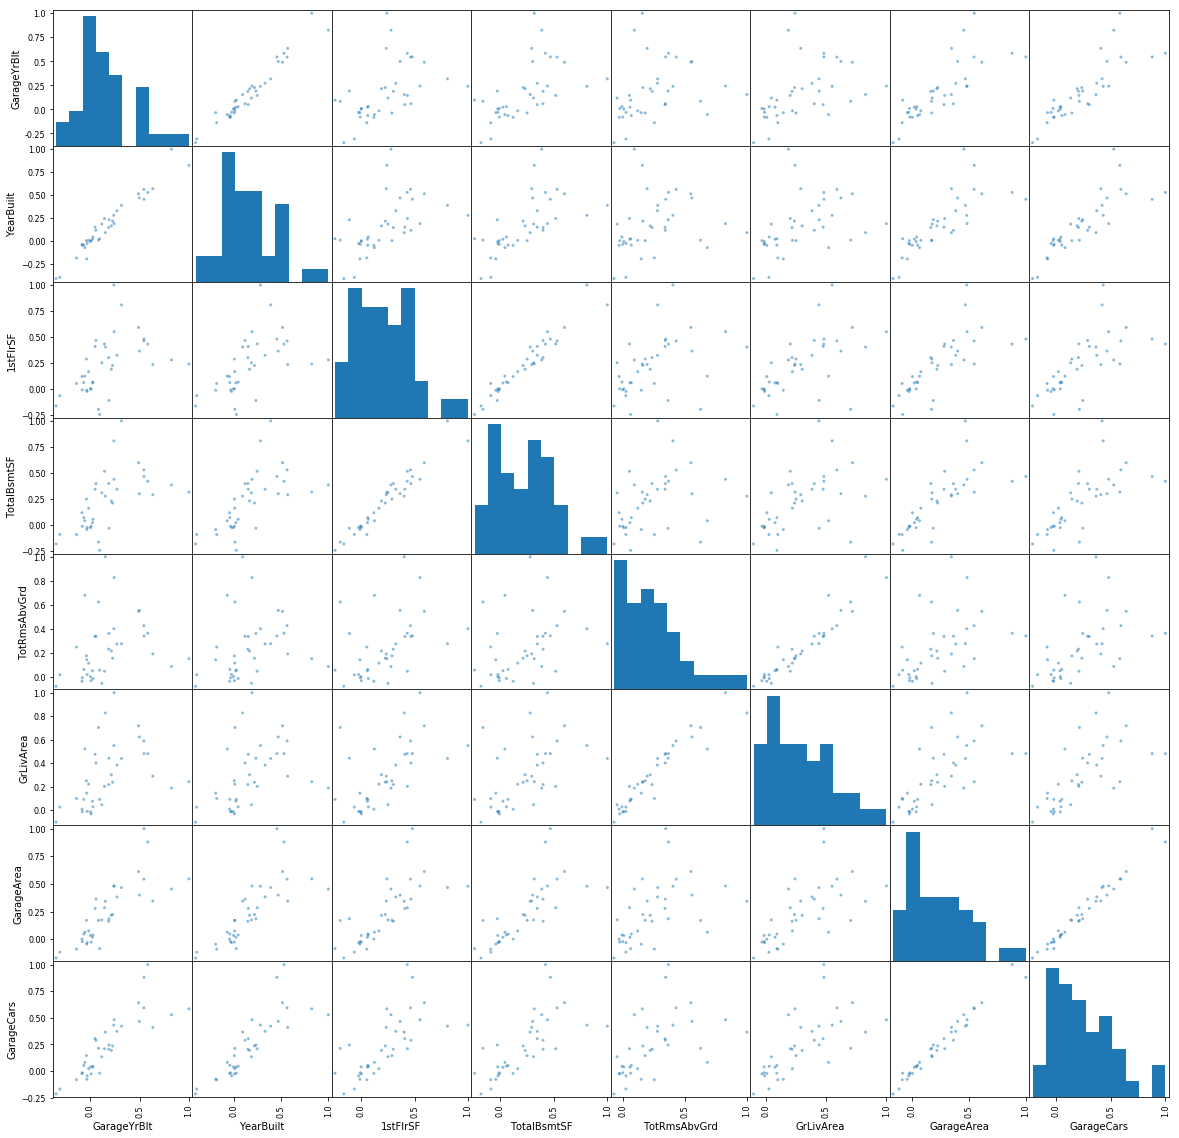

In [21]:
from pandas.plotting import scatter_matrix

scatter_df = correlation[["GarageYrBlt", "YearBuilt", "1stFlrSF", "TotalBsmtSF", "TotRmsAbvGrd", "GrLivArea", "GarageArea", "GarageCars"]].copy()

scat_plt = scatter_matrix(scatter_df, figsize=(20,20))

I can see that the values has a high correlation by it looking like a straight line in the plot. And we can also see that the values are pretty similar, especially for GarageArea and GarageCars

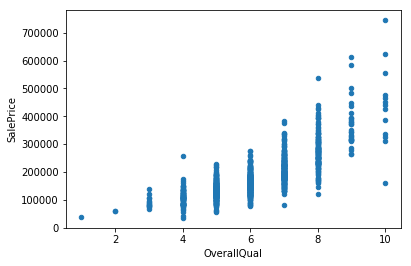

In [22]:
# Plot the graphs for the two values with highest correlation to the SalePrice
discover.plot(x="OverallQual", y="SalePrice", kind = "scatter")

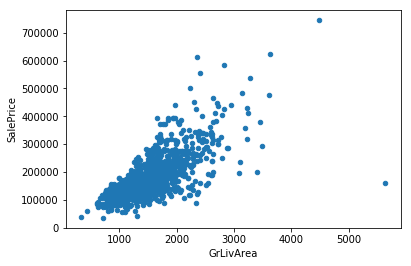

In [23]:
discover.plot(x="GrLivArea", y="SalePrice", kind="scatter")

I can see that as they increment so does the SalePrice. The correlation matrix already shows this, but it is interesting to see that there are some exceptions, like the one hta tis above 5000 on GrLivArea and still is at around 150 000 price. This tells me that it affects the price, but there are a lot of other factors that should be considered which will create a difference

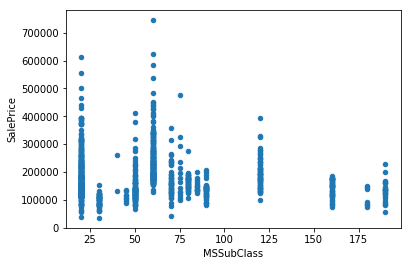

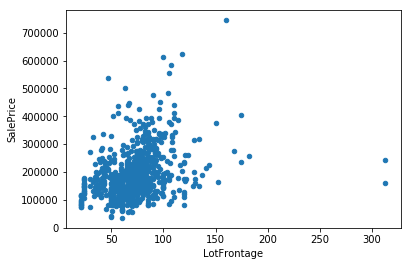

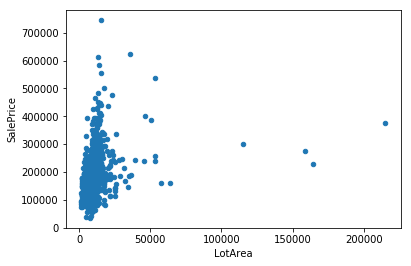

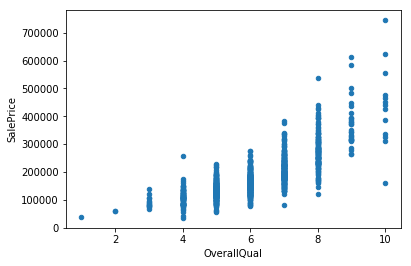

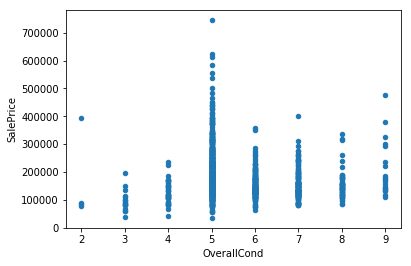

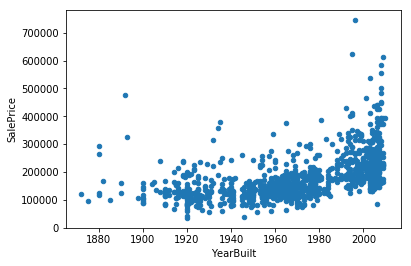

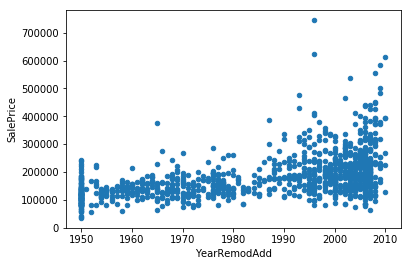

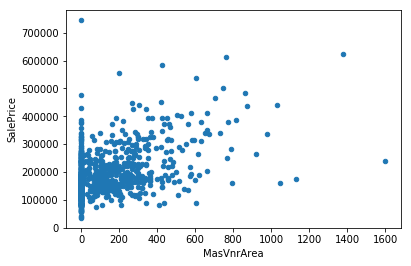

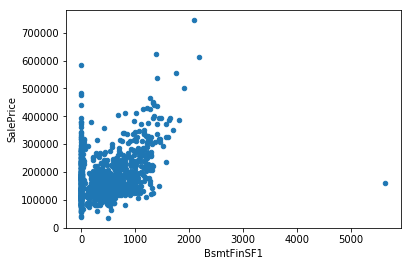

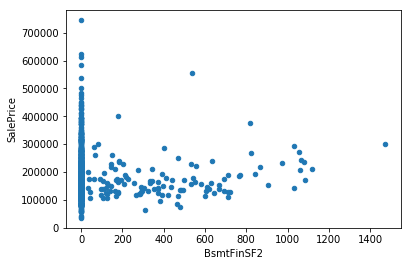

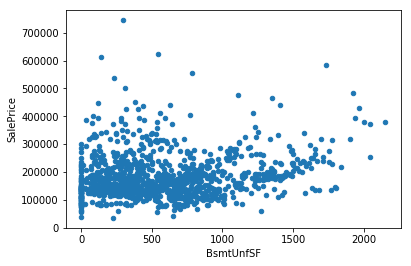

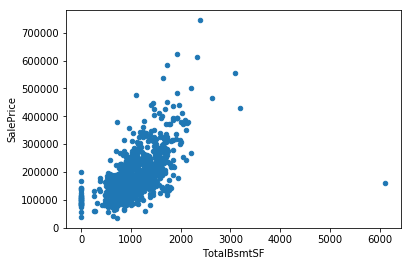

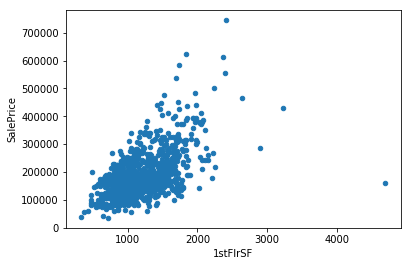

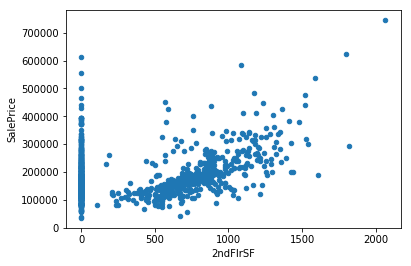

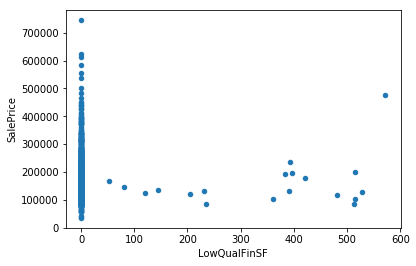

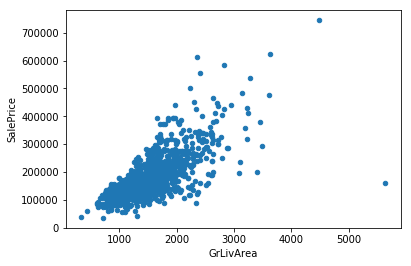

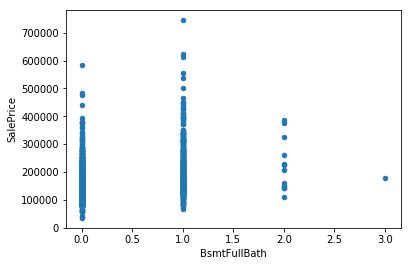

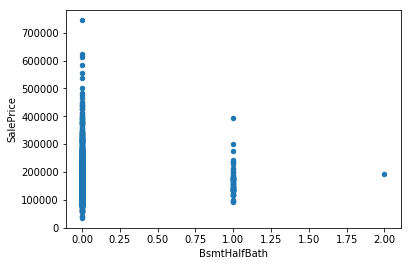

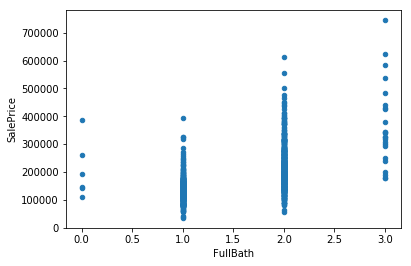

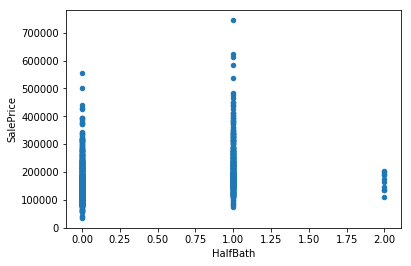

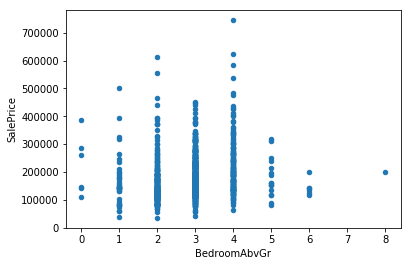

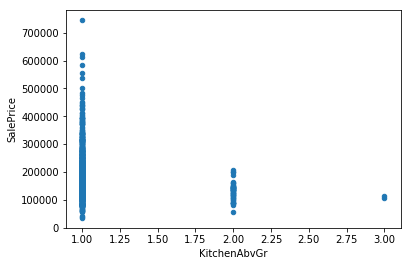

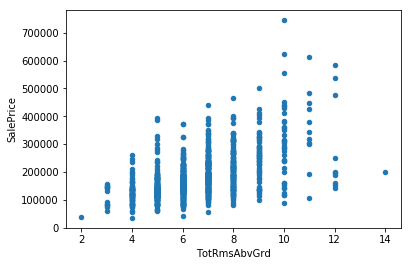

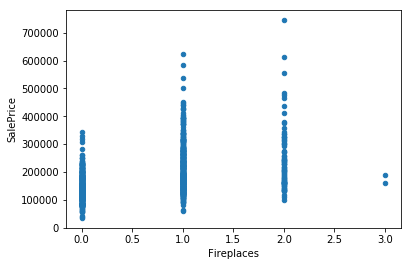

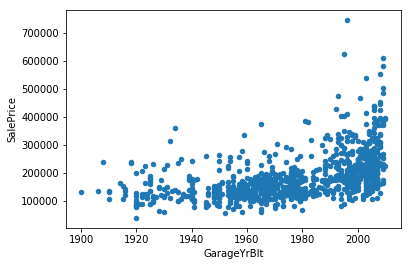

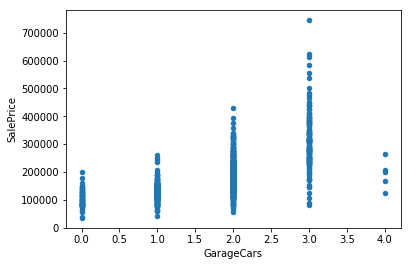

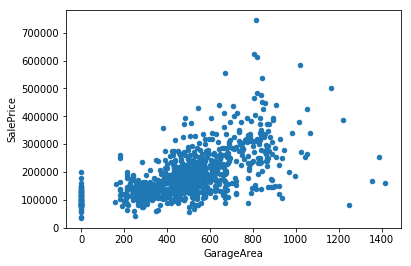

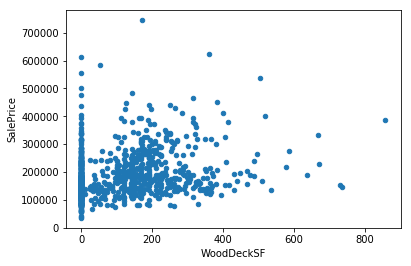

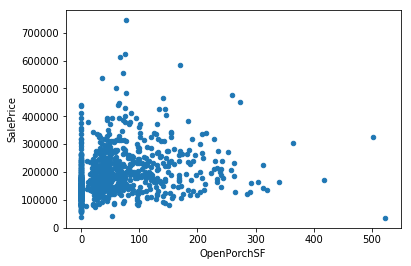

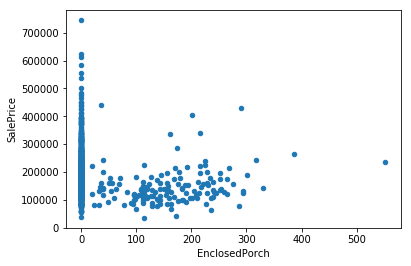

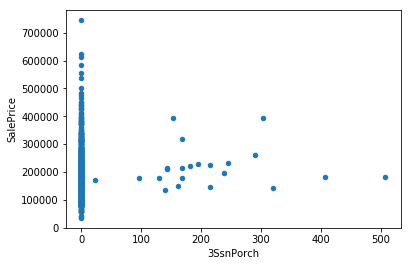

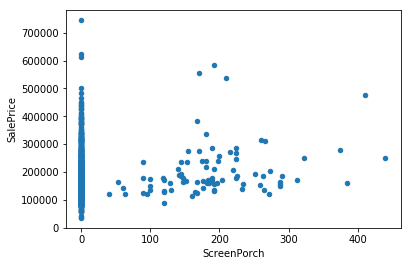

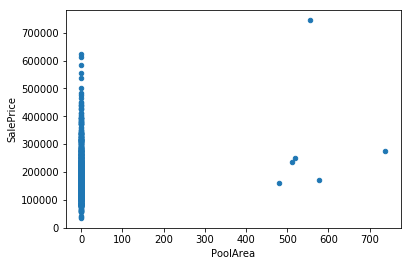

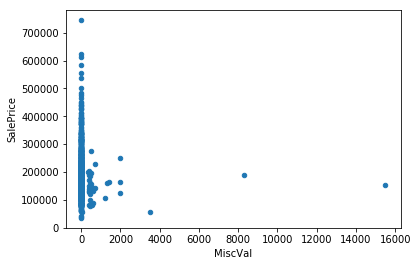

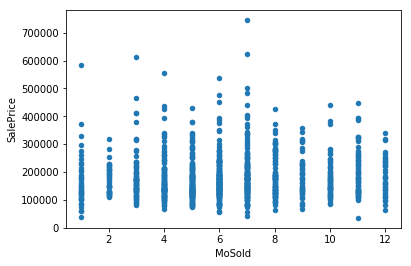

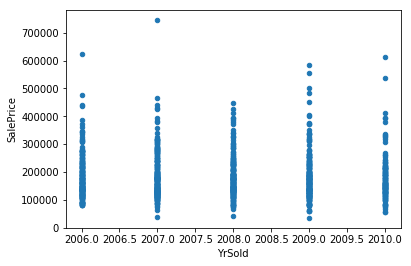

In [24]:
# See the SalePrice compared to all the numeric factors:
labels = list(discover.drop("SalePrice", axis =1).drop("Id", axis =1).select_dtypes(include=['int64', 'float64']))
for col in labels:
    discover.plot(x=col, y="SalePrice", kind="scatter")

This just gives an overview of how it affects the price

# Prepare the data for ML
Now that I have discovered the data we will have to prepare the data for the machine learning algorithm. First off all I should handle the null values. I will create transformers for the feature engineering I do on the dataset, and a pipeline, and run the dataset through it, so it gets formatted.

Let's start by finding all the attributes that have null values

In [25]:
# Remove the answer values so that we can validate the data and also not train the algortihm on the answers
answers_train = house_train["SalePrice"].copy()
house_train_drop = house_train.drop("SalePrice", axis=1)

In [26]:
# Create a fresh copy to work with
discover = house_train.copy()

In [27]:
discover.isnull().sum().sort_values(ascending=False)

PoolQC           1089
MiscFeature      1057
Alley            1026
Fence             878
FireplaceQu       513
LotFrontage       201
GarageCond         61
GarageType         61
GarageYrBlt        61
GarageFinish       61
GarageQual         61
BsmtExposure       32
BsmtFinType1       31
BsmtCond           31
BsmtQual           31
BsmtFinType2       31
MasVnrArea          5
MasVnrType          5
Electrical          1
LandSlope           0
LotConfig           0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [28]:
discover.iloc[1]

Id                  1050
MSSubClass            20
MSZoning              RL
LotFrontage           60
LotArea            11100
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Low
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     Edwards
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            4
OverallCond            7
YearBuilt           1946
YearRemodAdd        2006
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      MetalSd
Exterior2nd      MetalSd
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation        CBlock
                  ...   
BedroomAbvGr           2
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           6
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Detchd
GarageYrBlt         1946


In [29]:
# create a fresh set without answers
prepare = house_train_drop.copy()

There are 19 attributes that contain null values, I will now move over to handle these.

##### PoolQC
Looking at this I see that pool Quality only have 6 values, and that means there are only 6 houses that had pools. This is already expressed in the PoolArea, if it is 0, then there is no pool, so I can do one of three things. 
1. I can combine the two attributes into one explaining both quality and size
2. I can remove the poolQC and only keep the poolArea
3. I can add a value for not having a pool in poolQC

I think that I am going to go for the second one

In [30]:
prepare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1113 to 969
Data columns (total 80 columns):
Id               1095 non-null int64
MSSubClass       1095 non-null int64
MSZoning         1095 non-null object
LotFrontage      894 non-null float64
LotArea          1095 non-null int64
Street           1095 non-null object
Alley            69 non-null object
LotShape         1095 non-null object
LandContour      1095 non-null object
Utilities        1095 non-null object
LotConfig        1095 non-null object
LandSlope        1095 non-null object
Neighborhood     1095 non-null object
Condition1       1095 non-null object
Condition2       1095 non-null object
BldgType         1095 non-null object
HouseStyle       1095 non-null object
OverallQual      1095 non-null int64
OverallCond      1095 non-null int64
YearBuilt        1095 non-null int64
YearRemodAdd     1095 non-null int64
RoofStyle        1095 non-null object
RoofMatl         1095 non-null object
Exterior1st      1095 non-

#### MiscFeature

In [31]:
prepare.loc[prepare["MiscFeature"].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal
1200,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml
890,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal
766,767,60,RL,80.0,10421,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,500,3,2010,WD,Normal
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,500,4,2007,COD,Normal
1210,1211,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal
392,393,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,1200,7,2007,WD,Normal
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal
1171,1172,20,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,...,288,0,NaN,NaN,Shed,1400,11,2008,WD,Normal
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca


These are all the features, which is mostly if it has a shed or a second garage. There is a feature called MiscValue, I will only keep this. Not what it actually is. This is beacause the value of it gives more to the algorithm than a feature telling it what it is.

#### Alley
Remove this value since there are so many missing values
#### Fence
Replace the nan values so that we can use encoder
#### FireplaceQu
same for this
#### LotFrontage
I think for this value I will replace all the missing values with the median of the others
#### GarageCars, GarageYrBlt
As discussed in Discover the data I will remove the GarageCars and GarageYrBlt
#### GarageCond, GarageType, GarageFinish, GarageQual
All of these are missing equal amount of values, and that is because these are missing where there is no garage

#### BsmtExposure, BsmtFinType1, BsmtCond
The values I will do to numeric.

#### BsmtFinType2 
This is null if there is no basement so I will replace it with "No"

#### BsmtQual 
The height of the basement, I think I will replace it with numerical value

#### MasVnrArea
replace nan with 0

#### MasVnrType
replace nan with "No"

#### Electrical
There's only one missing so we'll replace it with "No" 

### Handling
To do this I will create a class that transforms the data into how we want it.

In [32]:
import math
from sklearn.base import TransformerMixin

drop_obj = ["Alley", "MiscFeature", "PoolQC"]
values_cat = ["Fence", "FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", 
                  "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual", "Electrical",
                  "MasVnrType"]
drop_numeric = ["GarageYrBlt", "GarageCars"]

class HandlenanDropcol(TransformerMixin):
    def __init__(self, type_cat = False):
        self.type_cat = type_cat
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.type_cat:
            for i in range(len(drop_obj)):
                X = X.drop(drop_obj[i], axis=1)
            for col in values_cat:
                X[col] = X[col].replace(math.nan, "No")
        else:
            for col in drop_numeric:
                X = X.drop(col, axis=1)
            
            X["MasVnrArea"] = X["MasVnrArea"].replace(math.nan, 0)
        
        return X
    
class CreateArray(TransformerMixin):
    def __init__(self, matrix = True):
        self.matrix = matrix
    def fit(self, X, y=None):
        return self
    def transform (self, X, y=None):
        if self.matrix:
            return X.toarray()
        
        return X
        

Now our datasets are quite small, so there is a problem that occured which I solved this way

Problem: OneHotEncoder adds different amounts of columns for the two sets. For example if the train set has a column "quality", and that column can have the values "Ex", "Good", "Bad", and these are represented at least one time in the train set. Then OneHotEncoder adds 3 columns, one for each of these values.

But if the test set only has values from "Ex" and "Bad" then OneHotEncoder only adds 2 columns, so we can not compare these two since they do not have the same amount of columns.

Solution: Create a wrapper that fit OneHotEncoder to the whole dataset, and transform the other datasets using this fitted OneHotEncoder.

This is not optimal since we technically shows data to the model that it should not know about, but this is the way we decided to solve this problem, and we can not only fit OHE to the train set, because there are values represented in the test set that are not in the train set.

In [33]:
from sklearn.preprocessing import OneHotEncoder

numerics = ['int64', 'float64']
categorics = ['object']

# There are some values in the test set that aren't in the train set
selector = house_prices.select_dtypes(include=categorics).copy()

class MySimpleEncoder(TransformerMixin):
    def __init__(self):
        self.ohe = OneHotEncoder()
        # 1.  Find categories that we want and remove nan and columns
        self.handler = HandlenanDropcol(type_cat=True)
        self.categories = self.handler.fit_transform(selector)
    
    def fit(self, X, y=None):
        # 2.  Fit self.ohe on these
        return self.ohe.fit(self.categories)
        
    def transform(self, X, y=None):
        # 3.  return self.ohe.transform(X)
        return self.ohe.transform(X)

Create the categorical pipeline and then test the logic

In [34]:
from sklearn.pipeline import Pipeline

pipeline_cat = Pipeline([
    ('handler', HandlenanDropcol(type_cat=True)),
    ('encoder', MySimpleEncoder()),
    ('array', CreateArray())
])

Testing that both sets get equal amount of columns:

In [35]:
test_train = pipeline_cat.fit_transform(prepare.select_dtypes(include=categorics))
test_train.shape

(1095, 255)

In [36]:
test_test = pipeline_cat.fit_transform(house_test.select_dtypes(include=categorics))
test_test.shape

(365, 255)

I know I didn't handle all the nan values in the code above, the LotFrontage is still there, since I will replace it with the median, I create a pipeline to do so. This is the pipeline that handles the numerics

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

pipeline_num = Pipeline([
    ('handler', HandlenanDropcol()),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


testing the logic of the numeric pipeline to see that it removes a row

In [38]:
num_train_test = pipeline_num.fit_transform(prepare.select_dtypes(include=numerics))
num_train_test.shape

(1095, 35)

Now I will create a complete pipeline that handles both the numeric and the categorical features of the dataset, for all datasets I wna tit to have the same amount of columns as output

In [39]:
from sklearn.compose import ColumnTransformer

attr_numeric = list(prepare.select_dtypes(include=numerics))
attr_categoric = list(prepare.select_dtypes(include=categorics))

comp_pipe = ColumnTransformer([
    ("num", pipeline_num, attr_numeric),
    ("cat", pipeline_cat, attr_categoric)
])

In [40]:
test_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
num_train_test

array([[ 0.88273771, -0.87216524, -0.20511385, ..., -0.08153792,
        -0.48465697, -0.62134156],
       [ 0.73186519, -0.87216524, -0.46997194, ..., -0.08153792,
        -0.85970954,  1.65160612],
       [ 1.04303976,  1.4905783 , -0.29339988, ..., -0.08153792,
         1.76565844,  0.13630767],
       ...,
       [ 0.07887007,  0.54548088,  1.03089059, ..., -0.08153792,
        -1.23476211,  1.65160612],
       [ 1.16090892,  0.78175524, -0.02854179, ..., -0.08153792,
        -0.48465697, -1.37899079],
       [ 0.54327455,  3.14449877,  0.19217329, ..., -0.08153792,
        -1.23476211, -1.37899079]])

In [42]:
prepared_data = comp_pipe.fit_transform(prepare)

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
prepared_data.shape

(1095, 290)

In [44]:
prepared_data

array([[ 0.88273771, -0.87216524, -0.20511385, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73186519, -0.87216524, -0.46997194, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04303976,  1.4905783 , -0.29339988, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.07887007,  0.54548088,  1.03089059, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16090892,  0.78175524, -0.02854179, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54327455,  3.14449877,  0.19217329, ...,  0.        ,
         1.        ,  0.        ]])

# Select and train a model
Now that I have prepared the data for a model I will test some different models to see which performs best on the dataset that I have. There are a lot of different models to try, my guess is that xgboost will perform best for the data

In [45]:
# testing a linear model
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(prepared_data, answers_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
some_prep = comp_pipe.fit_transform(house_train)
some_prep[:5]

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 0.88273771, -0.87216524, -0.20511385, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73186519, -0.87216524, -0.46997194, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04303976,  1.4905783 , -0.29339988, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.3164962 ,  2.90822442, -1.57354733, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.9817478 , -0.87216524,  0.85431853, ...,  0.        ,
         1.        ,  0.        ]])

In [47]:
lin_data = some_prep[:5]
lin_label = answers_train.iloc[:5]

Let's predict on the first five rows in the dataframe and see how well our model performs

In [48]:
print(linear.predict(lin_data))

[134054.  91356. 340712. 150350. 220884.]


In [49]:
print(list(lin_label))

[134500, 84900, 392500, 140000, 218000]


Finding the mean squared error for our model

In [50]:
from sklearn.metrics import mean_squared_error

all_pred = linear.predict(prepared_data)
linear_mean = mean_squared_error(answers_train, all_pred)
linear_rmean = np.sqrt(linear_mean)
linear_rmean

18902.76770389934

In [51]:
#Find highest and lowest value for SalePrice to check if the model is good or not
print("Min value:", answers_train.min(), "max value:", answers_train.max())

Min value: 34900 max value: 745000


An error of 18894 is pretty good considering it ranges from 34900 to 745000 especially for being a linear model. But it might be very overfitted.

In [52]:
# Now let's test it on the test set to see if it really is good
y_test = house_test.drop("SalePrice", axis=1).copy()
y_label = house_test["SalePrice"].copy()

prep_y = comp_pipe.fit_transform(y_test)
predict_test = linear.predict(prep_y)
lintst_mean = mean_squared_error(y_label, predict_test)
lintst_rmean = np.sqrt(lintst_mean)
lintst_rmean

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


591503252203377.6

So we can be pretty certain when we say that this model was overfitted on the data we had.

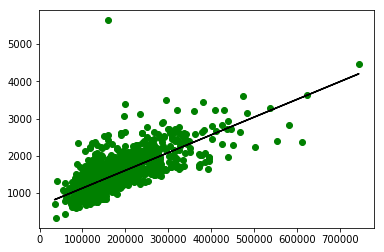

In [53]:
# Model for how the values increase based on the LotArea, and what the values actually are
X = answers_train.values[:,np.newaxis]
y = prepare['GrLivArea'].values

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

It looks like a pretty good model, and it does not look overfitted. But results from the test set shows otherwise

Let's create a model for using the Decision Tree Regressor, this will probably get prefect result meaning that it is overfitted

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=21)
tree.fit(prepared_data, answers_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=21, splitter='best')

In [55]:
tree_predictions = tree.predict(prepared_data)
tree_mean = mean_squared_error(answers_train, tree_predictions)
tree_rmean = np.sqrt(tree_mean)
tree_rmean

0.0

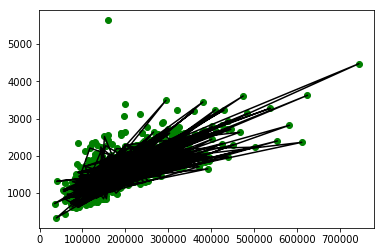

In [56]:
X = answers_train.values[:,np.newaxis]
y = prepare['GrLivArea'].values

model = DecisionTreeRegressor()
model.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

As expected the tree model will overfit the model, so it hits every possible output perfectly. This is not a good model because it is so well fitted to our data that it will give us results that are bad for other data that it does not know.
### XGBoost
Now I'll try the XGBoost model which takes a bunch of different models and combines them into one supermodel.

In [57]:
import xgboost as xgb

dtrain = xgb.DMatrix(prepared_data, label=answers_train)
dtrain

In [58]:
#Parameters for training the XGBoost model, silent so that it doesn't print all the outputs and nthreads is the numbers of threads to be used, lower it if you dojn't have the same amount as I have
param = {'silent': 1,  'nthread' : 14}

In [59]:
# Create validation set from house_train

val_train, val_test = train_test_split(house_train, random_state=21)
Xval_train = val_train.drop("SalePrice", axis=1)
Xval_test = val_train["SalePrice"]
yval_train = val_test.drop("SalePrice", axis=1)
yval_test = val_test["SalePrice"]

In [60]:
# Validation and training set matrix to be used in the evalutation
dval_train = xgb.DMatrix(comp_pipe.fit_transform(val_train), label=Xval_test.values)
dval_test = xgb.DMatrix(comp_pipe.fit_transform(val_test), label=yval_test.values)

evaluation = [(dval_test, 'eval'), (dval_train, 'train')]

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
rounds = 5
boost_five = xgb.train(param, dval_train, rounds, evaluation)

[0]	eval-rmse:139837	train-rmse:143227
[1]	eval-rmse:101137	train-rmse:103635
[2]	eval-rmse:75873	train-rmse:75844.2
[3]	eval-rmse:57400.3	train-rmse:56069.1
[4]	eval-rmse:45781.2	train-rmse:42075.2


With 5 rounds it gets a root mean squared error of 45655 for the evaluation set, let's see how well it  does for 10 rounds:

In [62]:
rounds = 10
boost_ten = xgb.train(param, dval_train, rounds, evaluation)

[0]	eval-rmse:139837	train-rmse:143227
[1]	eval-rmse:101137	train-rmse:103635
[2]	eval-rmse:75873	train-rmse:75844.2
[3]	eval-rmse:57400.3	train-rmse:56069.1
[4]	eval-rmse:45781.2	train-rmse:42075.2
[5]	eval-rmse:38789.3	train-rmse:32125.6
[6]	eval-rmse:34071	train-rmse:25056.3
[7]	eval-rmse:31566.5	train-rmse:20082.7
[8]	eval-rmse:29756.9	train-rmse:16424.9
[9]	eval-rmse:28397	train-rmse:14042.4


I might be overfitting the model at this point, which I do not want.

In [63]:
# Lower n_jobs if you have less than 14 threads on your cpu
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=21, n_job=14, n_estimators=2)

xgb_clf.fit(prepared_data, answers_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2,
       n_job=14, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [64]:
xgb_predictions = xgb_clf.predict(prepared_data)
xgb_mean = mean_squared_error(answers_train, xgb_predictions)
xgb_rmean = np.sqrt(xgb_mean)
xgb_rmean

73780.76171560687

XGBClassifier fitted to the prepared data. This is the model I will use and fine-tune, it doesn't seem like the model is overfitted

# Fine-Tune your model
I'll use GridSearchCV to find good parameters for our model. We do not want to go completely overboard in danger of overfitting and the estimation taking too much time. If you're running this on a computer with less than 14 threads it is adviced to lower the number of jobs: 'n_jobs' 

In [65]:
# Takes a little while to run
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':[0.05, 0.1, 0.2], 'max_depth':[3,4,5], 'n_estimators':[3, 10, 20], 'colsample_bytree':[0.7, 1]}

xgboost = xgb.XGBClassifier(random_state=21, n_jobs=14, silent = 1)

grid_search = GridSearchCV(xgboost, param_grid, cv=2, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(prepared_data, answers_train)

E:\Anaconda\envs\dat158\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=14, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5], 'n_estimators': [3, 10, 20], 'colsample_bytree': [0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [66]:
# Printing best parameters found from the GridSearch
grid_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 20}

In [67]:
# All values for the best parameters
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=14, nthread=None, objective='multi:softprob',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=1)

In [68]:
# Results from all runs
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.470426,0.292267,0.053549,0.010510,0.7,0.05,3,3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.574673e+09,-2.126137e+09,-5.193392e+09,2.058334e+09,46,-1.958920e+09,-7.004304e+09,-4.481612e+09,2.522692e+09
1,1.452574,0.983147,0.118608,0.050546,0.7,0.05,3,10,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.002771e+09,-2.267973e+09,-4.843108e+09,1.728088e+09,31,-1.902649e+09,-6.847947e+09,-4.375298e+09,2.472649e+09
2,2.932668,1.881712,0.219700,0.099591,0.7,0.05,3,20,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-5.750731e+09,-2.072083e+09,-4.608502e+09,1.702108e+09,21,-1.587088e+09,-6.846517e+09,-4.216802e+09,2.629714e+09
3,0.453412,0.304276,0.050546,0.016515,0.7,0.05,4,3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.574673e+09,-2.126137e+09,-5.193392e+09,2.058334e+09,46,-1.958920e+09,-7.004304e+09,-4.481612e+09,2.522692e+09
4,1.433804,0.967380,0.118608,0.051547,0.7,0.05,4,10,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.002771e+09,-2.267973e+09,-4.843108e+09,1.728088e+09,31,-1.902649e+09,-6.847947e+09,-4.375298e+09,2.472649e+09
5,2.844636,1.909785,0.213194,0.099090,0.7,0.05,4,20,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-5.736368e+09,-2.072377e+09,-4.598690e+09,1.695326e+09,19,-1.575249e+09,-6.847279e+09,-4.211264e+09,2.636015e+09
6,0.487746,0.338611,0.058834,0.020799,0.7,0.05,5,3,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.574673e+09,-2.126137e+09,-5.193392e+09,2.058334e+09,46,-1.958920e+09,-7.004304e+09,-4.481612e+09,2.522692e+09
7,1.451320,0.967880,0.120109,0.048044,0.7,0.05,5,10,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-6.002771e+09,-2.267973e+09,-4.843108e+09,1.728088e+09,31,-1.902649e+09,-6.847947e+09,-4.375298e+09,2.472649e+09
8,3.028508,2.092150,0.218699,0.103595,0.7,0.05,5,20,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-5.736368e+09,-2.072377e+09,-4.598690e+09,1.695326e+09,19,-1.575249e+09,-6.847279e+09,-4.211264e+09,2.636015e+09
9,0.462420,0.311283,0.051046,0.016014,0.7,0.1,3,3,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",-6.581365e+09,-1.980219e+09,-5.152699e+09,2.128947e+09,43,-2.021616e+09,-6.617431e+09,-4.319523e+09,2.297908e+09


In [69]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

72065.19347612053 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 3}
69592.44156244866 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 10}
67885.95120512533 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20}
72065.19347612053 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 3}
69592.44156244866 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 10}
67813.64537376337 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 20}
72065.19347612053 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 3}
69592.44156244866 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 10}
67813.64537376337 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20}
71782.30111714907 {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth

# Present Your Solution

Lets create the XGBoost classifier with the parameters we found, and then I will test the solution on the test set we created early on to present my solution for this problem

In [70]:
# take the best model from the grid search as our new final model
final_clf = grid_search.best_estimator_

In [71]:
# Test on the test set and get mean squared error for that value
y_test = house_test.drop("SalePrice", axis=1).copy()
y_label = house_test["SalePrice"].copy()

y_test_prepared = comp_pipe.transform(y_test)
clf_predictions = final_clf.predict(y_test_prepared)

clf_mean = mean_squared_error(y_label, clf_predictions)
clf_rmean = np.sqrt(clf_mean)

In [72]:
clf_rmean

50511.408071704966

I get an error of about 50000 which considering the value varies from 34900 to 745000, it's not that bad, but it isn't great

In [73]:
from scipy import stats

#Finding confidence interval of 95%
confidence = 0.95
squared_errors = (clf_predictions - y_label) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m-1, loc=np.mean(squared_errors), scale = stats.sem(squared_errors)))

array([37200.81304866, 60982.81888607])

The confidence interval varies a lot

In [74]:
ten_data = house_test.drop("SalePrice", axis=1)[:10]
ten_answer = house_test["SalePrice"][:10]

ten_data_prep = comp_pipe.transform(ten_data)
ten_predict = final_clf.predict(ten_data_prep)

ten_predict

array([176000, 155000, 191000, 230000, 135000, 325000, 181000, 310000,
       280000, 143000], dtype=int64)

In [75]:
list(ten_answer)

[157000,
 205000,
 245350,
 210000,
 135000,
 315500,
 159895,
 335000,
 386250,
 137500]

# Final Thoughts
So this is my final model. It has an error of around 50 000 which for me is pretty good and I am happy with this model. I think I could have gotten better results doing some more feature engineering. Maybe combining some of them so that there is less for the algorithm to consider. But for me now I do not have the time to do so, maybe if I keep on working on it I can get better results. Also I could include some attributes that I know are a factor in the sale price, like inflation and such.

So all in all I am happy with this project, I have learned a lot doing it!